In [1]:
#hiddencell
%pip install seaborn 

from pbl_tools import *

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

# 스테이지 4. 데이터 전처리 및 기본 모델 학습과 평가
## 도입
이번 스테이지에서는 데이터 전처리와 기본 모델 학습 및 평가에 중점을 둡니다. 이전 스테이지에서는 데이터의 구조와 상호 작용에 대한 이해를 높였으며, 이제는 실제 모델 학습을 위한 데이터 준비와 전처리 과정을 다룰 것입니다.

데이터 전처리는 모델 학습의 핵심 단계 중 하나로, 데이터의 품질을 향상시키고 모델의 성능을 향상시키는 데 중요한 역할을 합니다. 여기서는 pandas를 사용하여 데이터를 읽어오고, 결측값을 처리하며, 범주형 데이터를 인코딩하는 방법을 배울 것입니다.

또한 기본 모델인 RandomForestClassifier를 활용하여 데이터를 학습하고, 모델의 성능을 검증 데이터를 통해 평가할 것입니다. 이를 통해 모델의 초기 성능을 확인하고 개선 방향을 찾을 것입니다.

마지막으로, 데이터 전처리를 개선하고 RandomForest 모델을 활용하여 데이터의 특성 중요도를 분석하는 방법을 배울 것입니다.

## 학습 목표
- 데이터를 훈련 세트와 검증 세트로 나누기 위해 train_test_split 함수를 활용하는 방법을 이해한다.
- 범주형 데이터를 LabelEncoder를 이용하여 인코딩하는 방법을 익힌다.
- randomForestClassifier 모델을 활용하여 검증 데이터에 대한 예측을 수행하고 모델 성능을 평가할 수 있다.
- Macro F1 스코어를 계산하고 결과를 출력할 수 있다.
- 결측값 처리에 Imputer를 적절히 활용할 수 있다.
- 데이터 전처리를 위해 불필요한 열을 삭제하는 기술을 습득한다.
- RandomForestClassifier 모델을 활용하여 데이터의 특성 중요도를 파악하는 방법을 이해한다.

# 1. pandas를 이용해 csv 파일 읽어오기
[문제 1]  
train.csv 파일을 train 변수로 읽어오세요.  

In [2]:
import pandas as pd    

train = pd.read_csv('___')  

In [3]:
#checkcode
ensure_vals(globals(), 'train')
@check_safety
def check(
    user_train: pd.DataFrame,
):
    c_point1 = hasattr(user_train, 'tail')

    if c_point1 :
        return True
    else:
        return False

check(train)

True

### Inst.  


### Hint.
`pd.read_csv('파일경로/파일명')` 를 활용해 보세요.

### Solution.
```python
import pandas as pd  

train = pd.read_csv('train.csv')  
```

# 2. 결측값 제거 전후 데이터 확인

데이터 전처리는 머신러닝 모델링 과정에서 매우 중요한 단계입니다.   
이 과정에서 데이터의 품질을 개선하고, 분석에 적합한 형태로 변환합니다.   
결측값 처리는 이러한 전처리 과정 중 하나로, 우리가 사용할 데이터셋에 결측값이 있는지 확인해야 합니다.   
결측값은 모델링 단계에서 문제를 일으킬 수 있기 때문입니다.  

결측값을 처리하는 방법에는 다양하게 있지만, 가장 간단하면서도 효과적인 방법 중 하나는 결측값이 포함된 행(row)을 제거하는 것입니다.  
그래서 먼저 'train'에서 결측값을 확인하고, 이를 제거하는 과정을 진행해보겠습니다.

[문제 2]
- `isnull().sum()` 함수를 사용하여 각 열에 몇 개의 결측치가 존재하는지 확인해 보세요.
- `dropna()` 함수를 사용하여 결측값이 포함된 행을 제거해 보세요.

In [ ]:
display("-----결측값 제거 전-----", train.___().___())

train_dropna = train.___()

display("-----결측값 제거 후-----", train_dropna.isnull().sum())

In [5]:
#checkcode
ensure_vals(globals(), 'train_dropna')
@check_safety
def check(
    user_answer:pd.DataFrame,
    train_dropna_shape:tuple
):
    c_point1 = user_answer.shape == train_dropna_shape
    
    if c_point1:
        return True
    else:
        return False
    
check(train_dropna, (3836, 16))

True

### Inst.
train 데이터프레임(DataFrame) 내의 결측값 수를 확인합니다.   
`train.isnull().sum()`은 각 열(column)에 대해 결측값의 수를 계산하고, 그 결과를 표시합니다.   
이를 통해 데이터프레임 내 어떤 열에 결측값이 얼마나 많이 있는지를 확인할 수 있습니다.

결측값이 제거된 새로운 데이터프레임인 train_dropna를 생성합니다.   
`dropna()` 함수는 데이터프레임에서 결측값이 있는 행(row)을 제거하고, 결측값이 없는 행만을 남겨둡니다.

train_dropna 데이터프레임 내의 결측값 수를 다시 확인합니다.   
결측값이 모두 제거되었으므로 이제 해당 데이터프레임은 결측값을 포함하지 않아야 합니다.


### Hint.
empty

### Solution.
```python
display("-----결측값 제거 전-----", train.isnull().sum())

train_dropna = train.dropna()

display("-----결측값 제거 후-----", train_dropna.isnull().sum())
```

# 3.독립변수 종속변수 설정

데이터 분석과 모델링에 들어가기 전에, 우리는 독립 변수와 종속 변수를 명확하게 구분해야 합니다.   
독립 변수는 우리가 예측을 위해 사용하는 입력 데이터로, 종속 변수는 우리가 예측하려는 대상입니다.

이 프로젝트의 목표는 'target' 값을 예측하는 것입니다.   
따라서 종속 변수 y는 'target' 열의 값으로 설정합니다.

반면, 독립 변수 X는 'target'과 'ID'를 제외한 나머지 모든 열의 값들로 설정합니다.   
여기서 'ID' 열은 각 행을 식별하는 데 사용되며, 이 값은 우리의 예측 작업에 영향을 주지 않기 때문에 제외합니다.

이제 pandas의 drop 함수를 사용하여 필요한 독립변수와 종속변수를 추출하고, 이들을 각각 x와 y라는 두 개의 별도 데이터 프레임으로 분리해보겠습니다


[문제 3]  
데이터프레임에서 열(Column)을 제거하기 위해 `drop()`함수를 사용해 봅시다.  
`drop()`함수를 사용하여 예측에 사용하지 않는 `ID` 칼럼(column)과 예측할 `target` 피처(feature)를 제거해주세요.  
`axis = 1` 로 설정 하여 해당 피처(feature)를 제거해주세요.

In [10]:
x = train_dropna.___(['___','___'], axis = ___)
y = train_dropna['target']

In [9]:
#checkcode
ensure_vals(globals(), 'x')
@check_safety
def check(
    user_answer:pd.DataFrame,
    train_dropna_shape:int
):
    c_point1 = len(user_answer.columns) == train_dropna_shape
    
    if c_point1:
        return True
    else:
        return False
    
check(x, 14)

True

### Inst.
예측에 사용하지 않는 ID 칼럼(column)과 예측할 target피처(feature)를 제거한 후 x 변수에 할당해 주고,  
예측할 변수 target를 y 변수에 할당해 주었습니다.  
`.drop()` 함수를 사용하면 특정 피처(feature)를 제거할 수 있습니다.  
`axis = 1` 로 설정을 하면 해당 피처(feature)를 제거할 수 있습니다.

### Hint.
empty

### Solution
```python
x = train_dropna.drop(['ID','target'], axis = 1)
y = train_dropna['target']
```

# 4.train_test_split을 사용한 (train / validation) 분할

우리는 전체 데이터셋을 학습용 데이터와 검증용 데이터로 나눠야 합니다.   
이렇게 하면 우리의 모델이 새로운, 이전에 보지 못한 데이터에 대해 얼마나 잘 예측하는지를 평가할 수 있습니다.

[문제 4]  
scikit-learn 라이브러리에서 제공하는 `train_test_split` 함수를 사용하여 데이터를 훈련 세트와 검증 세트로 나누어 보세요.

In [11]:
from sklearn.model_selection import ___

x_train, x_valid, y_train, y_valid = ___(x, y, test_size = 0.3, random_state = 42)

In [11]:
#checkcode
ensure_vals(globals(), 'x_valid', 'y_valid')
@check_safety
def check(
        user_answer_x : str,
        user_answer_y : str,
):
    c_point0 = hasattr(user_answer_x, 'head')
    c_point1 = hasattr(user_answer_y, 'head')

    if c_point0 and c_point1:
        return True
    else:
        return False

check(x_valid,y_valid)

True

### Inst.

이번 스테이지에서는 간단한 모델링을 진행할 예정입니다.   
모델을 만들기 전에, 만든 모델이 의미있는지를 확인하는 것이 중요합니다.   
그러나 단순히 주어진 데이터로 train 데이터를 학습시켜서 test 데이터로 예측을 수행하면,   
모델이 적합한지 판단하기 어렵습니다.   
또한, 머신러닝 모델을 train 데이터셋으로만 학습시킨 후 test 데이터를 예측하면,   
모델의 성능이 예상보다 낮게 나올 수 있습니다.   
이러한 현상을 보통 '과적합(Overfitting)'이라고 합니다.   

<img src="https://user-images.githubusercontent.com/88147986/150300564-6cd074fa-6fb0-4c2c-8d12-2e7d9730cbc4.png">
                                 이미지 출처 : educative.io

'과적합(Overfitting)' 문제를 해결하기 위해서는 **"train 데이터에서 validation 데이터를 분리"시켜서 모델의 적합성을 확인**해야 합니다.   
그렇게 함으로써 모델이 너무 학습 데이터에 과적합(Overfitting)되는 경우를 방지할 수 있습니다.   
과적합이 발생하면, 모델이 학습한 데이터에 대해서는 높은 성능을 보일 수 있지만 **새로운 데이터에 대해서는 성능이 현저히 떨어지는 문제**가 발생할 수 있습니다.

--- 
**[train 데이터에서 validation 데이터를 분리]**

<img width="523" alt="image" src="https://user-images.githubusercontent.com/75363345/225542990-ef846e56-fca4-485e-aa37-d473f43fa152.png">

위의 그림과 같이, 기존에 train과 test로 나누어져 있던 데이터 셋에서 train 데이터를 일정 비율의 train/validation으로 분리합니다.   
이렇게 분리한 train 데이터 중 일부를 학습에 사용하고,   
나머지를 validation 데이터로 사용하여 모델의 성능을 평가합니다.

데이터 분석 경진대회에서는 test 데이터셋에 대한 정답 정보가 없기 때문에,   
일반적으로 validation 데이터셋을 사용하여 모델을 검증합니다.   
이를 통해 모델이 적절하게 학습되었는지 확인하고, 일반화 성능을 평가할 수 있습니다.  

---

이제 train 데이터 셋에서 validation 데이터 셋을 분리해보겠습니다.
분리하는 방법은 scikit-learn 패키지의 model_selection 모듈 안에 있는 train_test_split 함수를 사용하면 간편합니다.  
이 함수는 x와 y 데이터를 인자로 받고, test_size 옵션을 이용하여 비율(0~1 사이)을 조절할 수 있습니다.  
또한 random_state 옵션을 이용하여 실행할 때마다 동일한 결과를 얻을 수 있습니다.  
함수를 사용하면 x_train, x_valid, y_train, y_valid와 같이 학습 데이터셋과 검증 데이터셋으로 데이터를 분할할 수 있습니다.  

```
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=비율(0~1 사이), random_state=숫자)
```

- x: 학습에 사용되는 독립 변수 데이터   
- y: 예측하고자 하는 종속 변수 데이터   
- test_size: 테스트용 데이터 개수를 지정 (1보다 작은 실수를 기재할 경우, 비율을 나타냄)
- train_size: 학습용 데이터의 개수를 지정 (1보다 작은 실수를 기재할 경우, 비율을 나타냄)  
  \* train_size와 test_size는 둘 중 하나만 기재해도 됨
- random_state: 난수 시드 (동일한 데이터셋을 얻기 위한 파라미터)

---
위에서 설정한 독립변수는 X에, 종속변수는 y 자리에 할당했습니다.   
train 데이터 셋에서 검증용 데이터로 30%를 사용할 것이기 때문에 0.3을 test_size로 설정해 주었고,   
random_state는 42로 설정을 해 주었습니다.
 


### Hint.
empty

### Solution
```python
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)
```

# 5. 분할된 (train / validation) 데이터의 shape 확인  

train과 valid를 7:3의 비율로 분리하였습니다.   
올바르게 분리가 되었는지 확인해 보기 위해 `shape`을 확인해 보겠습니다. 

In [12]:
print('X_train 데이터 사이즈', x_train.shape)
print('X_valid 데이터 사이즈', x_valid.shape)
print(" ")
print('y_train 데이터 사이즈', y_train.shape)
print('y_valid 데이터 사이즈', y_valid.shape)

X_train 데이터 사이즈 (2685, 14)
X_valid 데이터 사이즈 (1151, 14)
 
y_train 데이터 사이즈 (2685,)
y_valid 데이터 사이즈 (1151,)


In [ ]:
#checkcode
#empty

### Inst.

### Hint.
empty

### Solution
empty

# 6. LabelEncoder를 사용한 범주형 데이터 인코딩

머신러닝 모델은 대부분 숫자형 데이터를 입력으로 받습니다.   
따라서 문자열이나 카테고리 데이터는 모델링에 사용하기 전에 숫자로 변환해야 합니다.   
이러한 변환을 수행하는 방법 중 하나는 레이블 인코딩(Label Encoding)입니다.

레이블 인코딩은 각 고유한 문자열 값에 대해 고유한 정수를 할당하는 방식입니다.   
Scikit-learn의 LabelEncoder 클래스를 사용하면 이 작업을 쉽게 수행할 수 있습니다.

[문제 6]
- `sklearn.preprocessing` 모듈에서 `LabelEncoder`라는 클래스를 불러와 보세요.
- 현재 열(column)의 데이터타입이 `object` 라면 아래 셀을 실행합니다.
- `LabelEncoder` 객체를 생성해 주세요.
- `fit_transform` 메서드를 사용하여 `x_train` 데이터프레임(DataFrame)의 현재 열을 숫자로 변환해 주세요.
- `unique` 함수를 사용하여 현재 열에 대해 모든 고유한 범주를 반복합니다.
- `transform` 메서드를 사용하여 x_train 데이터와 동일한 Label Encoding을 적용해주세요.

In [13]:
from sklearn.___ import ___
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in x_train.columns:
    if x_train[col].dtype == '___':
        
        le = ___()
        x_train[col] = le.___(x_train[col]) # 학습 데이터에 대해 LabelEncoder를 적용하고 변환

        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.___(x_valid[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        x_valid[col] = le.___(x_valid[col]) # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [14]:
#checkcode
ensure_vals(globals(), 'x_train')
@check_safety
def check(
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    dtype: str,
    num: int
):
    
    train_object_cols = train_df.select_dtypes(include=dtype).columns
    valid_object_cols = val_df.select_dtypes(include=dtype).columns

    c_point0 = len(train_object_cols) == num
    c_point1 = len(valid_object_cols) == num

    if c_point0 and c_point1:
        return True
    else:
        return False

check(x_train, x_valid, 'object', 0)

True

### Inst.

범주형(categorical) 데이터를 처리하기 위해 Label Encoding을 수행하는 과정을 나타냅니다.   
Label Encoding은 범주형 데이터를 숫자로 변환하여 머신러닝 모델이 이해할 수 있도록 하는 과정입니다.

- scikit-learn 라이브러리에서 `LabelEncoder` 클래스를 불러옵니다. 이 클래스는 범주형 데이터를 숫자로 인코딩하는 데 사용됩니다.
- `x_train` 데이터프레임의 모든 열(column)에 대한 반복문을 시작합니다.
- 현재 열이 데이터타입이 'object'인지 확인합니다.   
'object' 데이터타입은 주로 문자열을 나타내며, 범주형 데이터의 일반적인 형태입니다. 따라서 범주형 열에 대해서만 Label Encoding을 수행합니다.  
- `LabelEncoder` 객체를 생성합니다. 이 객체는 범주형 열을 숫자로 변환하는 데 사용됩니다.
- `fit_transform` 메서드를 사용하여 `x_train` 데이터프레임의 현재 열을 숫자로 변환합니다. Label Encoder는 각 범주에 대해 고유한 숫자를 할당합니다.
- `x_valid` 데이터프레임의 현재 열에 대해 모든 고유한 범주를 반복합니다.
- 현재 범주(label)가 Label Encoder의 클래스에 없는 경우
- Label Encoder의 클래스에 새로운 범주(label)를 추가합니다.
- `x_valid` 데이터프레임의 현재 열을 변환하여 훈련 데이터와 동일한 Label Encoding을 적용합니다.

이렇게 하면 훈련 데이터와 검증 데이터 모두에 대해 동일한 Label Encoding이 적용되어 범주형 데이터가 숫자로 변환됩니다.   
이후 이러한 숫자 데이터를 머신러닝 모델에 입력으로 사용할 수 있습니다.

### Hint.
empty

### Solution.
```python
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])  # 학습 데이터에 대해 LabelEncoder를 적용하고 변환
        
        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(x_valid[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        
        x_valid[col] = le.transform(x_valid[col])  # 검증 데이터에 대해 LabelEncoder를 적용하고 변환
```

# 7.RandomForestClassifier 모델을 사용한 valid 데이터 예측 및 평가

이제 우리는 머신러닝 모델을 생성하고 학습시킬 준비가 되었습니다.   
이번에 사용할 모델은 랜덤 포레스트입니다. 랜덤 포레스트는 여러 개의 결정 트리를 활용하여 결과를 예측하는 알고리즘으로,   
각각의 트리가 독립적으로 학습하기 때문에 과적합 문제를 상당히 잘 방지합니다.

[문제 7]
- `sklearn.ensemble` 모듈에서 `RandomForestClassifier` 클래스를 불러와주세요.
- `RandomForestClassifier` 모델을 생성하여 rf_classifier 변수에 할당해 주세요.
- 학습 데이터인 `x_train`과 `y_train`을 사용하여 학습시켜주세요.
- 학습된 모델을 사용하여 검증 데이터인 `x_valid`에 대한 예측을 수행합니다.

In [ ]:
from sklearn.___ import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = ____(random_state=42)
rf_classifier.fit(___, ___)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(___)

In [16]:
#checkcode
ensure_vals(globals(), 'rf_classifier','y_pred')
@check_safety
def check(
    user_answer_model:str,
    user_answer_predict:float,
    user_answer_test:float
):
    
    check_p0 = str(type(user_answer_model)) == "<class 'sklearn.ensemble._forest.RandomForestClassifier'>"
    check_p1 = len(user_answer_predict) == len(user_answer_test)

    if check_p0 and check_p1:
        return True
    else:
        return False

check(rf_classifier,y_pred,x_valid)

True

### Inst.
RandomForest 모델은 **여러 개의 의사결정트리(Decision Tree)를 조합**하여 만든 앙상블(Ensemble) 모델 중 하나입니다.   
각각의 의사결정트리는 데이터의 일부를 랜덤으로 선택하여 학습하며, 이를 통해 일반화 성능을 높입니다. 또한, RandomForest 모델은 분류와 회귀 문제에 모두 적용 가능합니다.

RandomForestClassifier의 주요 특징과 작동 방식은 다음과 같습니다:

- 앙상블 학습: RandomForestClassifier는 여러 개의 결정 트리(Decision Tree) 모델을 조합하여 높은 분류 성능을 달성하는 앙상블 학습 방법을 사용합니다. 이때, 각 결정 트리는 서로 독립적으로 학습하며 예측을 수행합니다.

- 무작위성: 랜덤 포레스트는 무작위성을 도입하여 각 트리의 다양성을 높입니다. 무작위성은 다음과 같은 방법으로 적용됩니다:

    - 부트스트랩 샘플링: 각 트리는 원본 데이터에서 중복을 허용한 무작위 샘플을 생성하여 학습합니다.
    - 무작위 특성 선택: 각 노드에서 특성을 선택할 때 전체 특성 중 일부만 고려합니다. 이렇게 하면 각 트리가 서로 다른 특성을 고려하게 되며, 다양한 관점에서 학습합니다.
    
- 부스팅  : 랜덤 포레스트는 다수의 결정 트리를 조합하여 예측을 수행하므로 과적합(Overfitting) 경향이 낮습니다. 또한, 이러한 특성으로 인해 노이즈에 강하며 안정적인 성능을 제공합니다.

- 중요도 측정: RandomForestClassifier는 각 특성의 중요도를 측정할 수 있으며, 어떤 특성이 분류 결정에 가장 중요한 역할을 하는지 확인할 수 있습니다. 이를 통해 특성 선택과 모델 해석에 도움이 됩니다.

- 예측 및 분류: 모델이 학습되면 새로운 데이터 포인트에 대한 분류를 예측할 수 있습니다. 각 결정 트리의 예측 결과를 다수결 투표 또는 평균을 통해 최종 예측 결과를 도출합니다.

RandomForestClassifier는 다양한 분류 문제에 적용할 수 있으며, 데이터의 특성과 크기에 따라 다양한 하이퍼파라미터를 조정하여 최적의 성능을 얻을 수 있습니다. 또한, scikit-learn과 같은 머신러닝 라이브러리에서 쉽게 사용할 수 있습니다.

![Random Forest_도식_직접제작 (1)](https://user-images.githubusercontent.com/75363345/234730997-483cb8f0-f9c8-4358-a168-ce7af0ccefc7.png)

해당 코드에 대한 설명은 다음과 같습니다.  
sklearn.model_selection 모듈에서 train_test_split 함수를 가져옵니다.  
sklearn.ensemble 모듈에서 RandomForestClassifier 클래스를 가져옵니다.  
RandomForestClassifier 모델을 생성하고, random_state 매개변수를 설정하여 결과 재현성을 보장합니다.  
RandomForestClassifier 모델을 학습 데이터인 x_train과 y_train을 사용하여 학습시킵니다.  
학습된 모델을 사용하여 검증 데이터인 x_valid를 입력으로 하여 예측을 수행하고, 예측 결과를 y_pred 변수에 저장합니다.
  

### Hint.
empty

### Solution
```python
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(x_valid)
```

# 8.RandomForest 모델의 Macro F1 스코어 계산 및 출력

모델의 성능을 평가하는 여러 가지 방법 중 하나는 F1 스코어를 계산하는 것입니다.   
F1 스코어는 정밀도와 재현율의 조화 평균으로, 모델이 양성 클래스를 얼마나 잘 예측했는지에 대한 척도입니다.   
특히, Macro F1 스코어는 다중 클래스 분류 문제에서 각 클래스별로 F1 스코어를 계산하고 이들의 평균값을 구함으로써 전체적인 모델 성능을 측정합니다.   
이번에는 sklearn 라이브러리의 f1_score 함수를 사용하여 우리의 예측 결과에 대한 Macro F1 스코어를 계산해보겠습니다.

[문제 8]
- `sklearn.metrics` 모듈에서 `f1_score` 함수를 가져와보세요.
- `f1_score` 함수를 사용하여 실제 레이블인 검증 데이터의 목표값 `y_valid`와 모델의 예측 결과 `y_pred`를 비교하여 Macro F1 스코어를 계산해보세요.  
- `average` 매개변수를 `macro`로 설정하여 Macro F1 스코어를 계산하고, 이 값을 macro_f1 변수에 저장해보세요.  
계산된 Macro F1 스코어를 화면에 출력합니다.  

In [14]:
from sklearn.___ import f1_score

# Macro F1 스코어 계산
macro_f1 = f1_score(y_valid, ___, average='___')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.7872447301227592


In [18]:
#checkcode
ensure_vals(globals(), 'macro_f1')
@check_safety
def check(
    macro_f1: float,
    macro_f1_check: float
):
    c_point1 = macro_f1 == macro_f1_check

    if c_point1 :
        return True
    else:
        return False

check(f1_score(y_valid, y_pred, average='macro'), f1_score(y_valid, y_pred, average=None).mean())

True

### Inst.

Macro F1 스코어는 분류(Classification) 모델의 성능을 측정하는 지표 중 하나입니다.   
이 스코어는 모든 클래스에 대한 F1 스코어를 계산하고, 그 평균을 구한 것입니다.   
F1 스코어는 정밀도(Precision)와 재현율(Recall)의 조화 평균입니다.

F1 스코어는 다음과 같이 정의됩니다:

> F1 = 2 * (Precision * Recall) / (Precision + Recall)

Precision은 모델이 Positive로 예측한 것 중에서 실제로 Positive인 비율을 나타냅니다.  
Recall은 실제로 Positive인 것 중에서 모델이 Positive로 예측한 비율을 나타냅니다.  
Macro F1 스코어는 각 클래스별로 F1 스코어를 계산하고, 이를 클래스 수만큼 더한 후 클래스 수로 나눈 값입니다.   
이를 통해 각 클래스의 중요도가 동등하게 고려됩니다.

예를 들어, 다중 클래스 분류 모델에서 세 가지 클래스 (A, B, C)에 대한 Macro F1 스코어를 계산한다고 가정해보겠습니다.   
이 경우, 각 클래스별로 F1 스코어를 계산하고, 이를 더한 후 클래스 수인 3으로 나누어 Macro F1 스코어를 구합니다.   
이것은 모든 클래스에 대한 분류 성능을 평균적으로 나타내는 지표로 사용됩니다.

---

#### 결과 해석

Macro F1 스코어는 0에서 1 사이의 값을 가집니다.   
값이 1에 가까울수록 모델의 성능이 좋다는 것을 의미하며, 반대로 0에 가까울수록 모델의 성능이 나쁘다는 것을 의미합니다.

여기서 Macro F1 스코어가 약 0.787로, 이는 전반적으로 모델의 성능이 꽤 좋은 편임을 나타냅니다.  
Macro F1 스코어는 각 클래스별로 동일한 가중치를 적용하여 평균을 구하므로, 불균형한 클래스 분포를 고려했다고 볼 수 있습니다.

### Hint.
empty

### Solution.
```python
from sklearn.metrics import f1_score

# Macro F1 스코어 계산
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)
```

# 9.데이터 분할 및 train/valid 데이터 준비

[문제 9]
- train.csv 파일을 train 변수로 읽어오세요.
- 독립변수 x에는 target 을 제외한 나머지 모든 열의 값들로 설정해 주세요.
- 종속변수 y에는 target 열의 값으로 설정해 주세요.
- 독립변수 x, 종속변수 y 데이터를 훈련 세트와 검증 세트로 나누어 보세요.

In [26]:
from sklearn.model_selection import train_test_split

train = pd.read_csv('___')

x = train.___([___], axis = ___)
y = train[___]

train_data, ___, ___, valid_targets = ___(___, ___, test_size = 0.3, random_state = 42)

In [20]:
#checkcode
ensure_vals(globals(), 'train_data', 'valid_data')
@check_safety
def check(
        user_answer_x : str,
        user_answer_y : str,
):
    c_point0 = hasattr(user_answer_x, 'head')
    c_point1 = hasattr(user_answer_y, 'head')

    if c_point0 and c_point1:
        return True
    else:
        return False

check(train_data,valid_data)

True

### Inst.

### Hint.
`drop()` 함수를 사용하면 특정 칼럼을 제거할 수 있습니다.

### Solution.
```python
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv')

x = train.drop(['target'], axis = 1)
y = train['target']

train_data, valid_data, train_targets, valid_targets = train_test_split(x, y, test_size = 0.3, random_state = 42)
```

# 10.결측값 보간(Imputer)을 통한 데이터 전처리

이전 단계에서는 결측치가 있는 행을 모두 제거하여 데이터를 정리했습니다.  
그러나 이 방법은 중요한 정보를 잃을 수 있으며, 데이터셋의 크기를 줄일 수 있습니다.   
따라서 이번에는 다른 접근 방식을 사용하여 결측치를 처리해보려 합니다.

결측치 보간(Imputation)은 누락된 값을 추정하는 과정입니다.   
이번 스텝에서는 'SimpleImputer'라는 sklearn의 유틸리티를 사용하여 결측치 보간을 진행하려 합니다.   
SimpleImputer는 기본적으로 평균, 중앙값, `최빈값` 등 다양한 전략으로 결측치를 채울 수 있습니다.

여기서 우리는 'most_frequent' 전략을 사용할 것입니다.   
즉, 각 특성(열)에서 가장 자주 등장하는 값으로 해당 특성의 결측치들을 대체합니다.   
여기서 선택한 특성은 'occupation'과 'workclass'로, 이들 열에 있는 모든 결측값들이 각각의 `최빈값`으로 대체될 것입니다.

[문제 10]  
- `sklearn.impute` 모듈에서 결측치 처리를 위한 `SimpleImputer` 클래스를 가져오세요.    
- `SimpleImputer` 객체를 생성하고, 결측치를 처리할 때 사용할 전략(strategy)을 `most_frequent`로 설정해주세요.  
- 학습 데이터셋인 `train_data`의 'occupation'과 'workclass' 열에 대해 결측치를 `최빈값`으로 채우기 위해 `imputer` 객체의 `fit_transform` 메서드를 사용합니다.   
- 검증 데이터셋인 `valid_data`의 'occupation'과 'workclass' 열에 대해 결측치를 `최빈값`으로 채우기 위해 `imputer` 객체의 `transform` 메서드를 사용합니다.   

이렇게 함으로써 'occupation'과 'workclass' 열의 결측치가 처리되고, 결측치가 있는 행들이 더 이상 없어집니다.

In [27]:
from sklearn.impute import ___

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='___')

train_data[['occupation','workclass']] = imputer.___(___[['occupation','workclass']])
valid_data[['occupation','workclass']] = imputer.___(___[['occupation','workclass']])

In [22]:
#checkcode
ensure_vals(globals())
@check_safety
def check(
    df: pd.DataFrame,
    col1: str,
    col2: str,
    zero: int
):
    c_point0 = df.isnull().sum()[col1] == zero
    c_point1 = df.isnull().sum()[col2] == zero

    if c_point0 and c_point1:
        return True
    else:
        return False

check(train_data, 'occupation', 'workclass', 0)

True

### Inst.
`SimpleImputer`는 sklearn의 impute 모듈에 포함된 클래스로, 결측치를 다루는 데 사용됩니다.   
이 클래스는 각 특성(열)의 결측값을 특정 값으로 대체하는 역할을 합니다.

`most_frequent` 전략은 이름에서 알 수 있듯이, 해당 특성에서 가장 자주 발생하는 값으로 결측치를 대체합니다.   
즉, 각 열의 최빈값(mode)를 찾아 그 값으로 결측치를 채웁니다.

예를 들어 'occupation'이라는 카테고리 변수에서 'Teacher', 'Engineer', 'Doctor' 등 여러 직업들이 있고,   
'Teacher'가 가장 많다면 `most_frequent` 전략을 사용하면 모든 결측치가 'Teacher'로 대체됩니다.

이 방법은 주로 범주형 데이터에 사용되며, 숫자형 데이터에 대해서도 사용할 수 있지만 평균(mean) 또는 중앙값(median) 전략을 적용하는 것이 일반적입니다.  
데이터의 분포를 고려하여 결측치를 대체하므로 해당 열의 특성을 유지하면서 결측치를 채울 수 있습니다.

### Hint.
empty

### Solution
```python
from sklearn.impute import SimpleImputer

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='most_frequent')
train_data[['occupation','workclass']] = imputer.fit_transform(train_data[['occupation','workclass']])
valid_data[['occupation','workclass']] = imputer.transform(valid_data[['occupation','workclass']])
```

# 11. 불필요한 열 제거를 통한 데이터 전처리

데이터 전처리 과정에서는 불필요한 특성을 제거하는 것이 중요합니다.   
이는 모델의 성능을 향상시키고, 학습 시간을 줄이며, 오버피팅(과적합)을 방지하는 데 도움이 됩니다. 

우리의 데이터셋에서 'ID', 'native.country', 그리고 'education' 열은 다음과 같은 이유로 제거할 예정입니다.

- 'ID': 이 특성은 각 샘플의 고유 식별자로, 모델 학습에 도움이 되지 않습니다. 실제로 ID는 종종 잡음(noise)으로 작용하여 모델의 성능을 저하시킬 수 있습니다.
- 'native.country': 이 특성은 결측치가 있는 행의 개수가 적어서 제거합니다. 결측치를 보간하는 대신에 해당 데이터를 제거하면 모델의 복잡도를 줄일 수 있습니다.
- 'education': 우리 데이터셋에는 이미 'education.num'라는 칼럼이 있으며, 이 칼럼은 'education' 칼럼과 동일한 정보를 담고 있습니다.   
중복된 정보를 가진 두 개의 특성이 있다면 한 개만 유지하고 다른 하나를 삭제하는 것이 좋습니다.

[문제 11]

`'native.country', 'ID', 'education'` 열을 각각 `train_data`과 `valid_data` 데이터프레임에서 삭제하여 이들 열을 제외한 나머지 열만 남게 해주세요.  

In [37]:
train_data = train_data.___(['ID','native.country','education'], axis = ___)
valid_data = valid_data.___(['ID','native.country','education'], axis = ___)

In [24]:
#checkcode
ensure_vals(globals())
@check_safety
def check(
    df: pd.DataFrame,
    col1: str,
    col2: str,
    col3: str,
):
    c_point0 = col1 not in df.columns
    c_point1 = col2 not in df.columns
    c_point2 = col3 not in df.columns

    if c_point0 and c_point1 and c_point2:
        return True
    else:
        return False

check(train_data, 'ID', 'native.country', 'education')

True

### Inst.

### Hint.

### Solution.
```python
train_data = train_data.drop(['ID','native.country','education'], axis = 1)
valid_data = valid_data.drop(['ID','native.country','education'], axis = 1)
```

# 12. LabelEncoder를 사용한 범주형 데이터 인코딩

- sklearn 패키지에서 LabelEncoder라는 클래스를 불러와 보세요.
- 현재 열의 데이터타입이 문자형이 라면 아래 셀을 실행합니다.
- train_data 데이터프레임에 LabelEncoder를 적용하고 변환시켜주세요.
- 현재 열에 대해 모든 고유한 범주를 반복합니다.
- valid_data 데이터프레임에 train_data 데이터와 동일한 Label Encoding을 적용해주세요.

In [ ]:
from sklearn.___ import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in train_data.columns:
    if train_data[col].___ == '___':
        
        le = LabelEncoder()
        train_data[col] = le.___(train_data[___])  # 학습 데이터에 대해 LabelEncoder를 적용하고 변환
        
        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in ___.___(valid_data[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        
        valid_data[col] = le.___(___[col])  # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [26]:
#checkcode
ensure_vals(globals(), 'train_data')
@check_safety
def check(
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    dtype: str,
    num: int
):
    
    train_object_cols = train_df.select_dtypes(include=dtype).columns
    valid_object_cols = val_df.select_dtypes(include=dtype).columns

    c_point0 = len(train_object_cols) == num
    c_point1 = len(valid_object_cols) == num

    if c_point0 and c_point1:
        return True
    else:
        return False

check(train_data, valid_data, 'object', 0)

True

### Inst.


### Hint.
- `sklearn.preprocessing` 모듈에서 `LabelEncoder`라는 클래스를 불러올 수 있습니다.
- `.dtype` 메소드를 이용하면 데이터 타입을 확인할 수 있습니다.
- 현재 열의 데이터타입이 `object` 라면 아래 셀을 실행합니다.
- `fit_transform` 메서드를 사용하면 LabelEncoder를 적용할 수 있습니다.
- `np.unique` 함수를 사용하면 현재 열에 대해 모든 고유한 범주를 추출할 수 있습니다.
- `transform` 메서드를 사용하여 valid_data 데이터에 Label Encoding을 적용할 수 있습니다.

### Solution.
```python
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])  # 학습 데이터에 대해 LabelEncoder를 적용하고 변환
        
        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(valid_data[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        
        valid_data[col] = le.transform(valid_data[col])  # 검증 데이터에 대해 LabelEncoder를 적용하고 변환
```

# 13.RandomForestClassifier 모델을 활용한 데이터 분석 및 성능 평가

[문제 13]
- sklearn 패키지에서 RandomForestClassifier 클래스를 불러와주세요.
- sklearn 패키지에서 f1_score 클래스를 불러와주세요.
- RandomForestClassifier 모델을 생성해 주세요. random_state 는 42로 설정하여 재현성을 보장해주세요.
- 학습 데이터를 사용하여 학습시켜주세요.
- 학습된 모델을 사용하여 검증 데이터에 대한 예측을 수행합니다.
- f1_score 함수를 사용하여 실제 레이블인 검증 데이터의 목표값과 모델의 예측 결과를 비교하여 Macro F1 스코어를 계산해보세요. 

In [ ]:
from sklearn.___ import RandomForestClassifier
from sklearn.___ import f1_score

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(___=42)
rf_classifier.fit(___, ___)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(___)

# Macro F1 스코어 계산
macro_f1 = f1_score(___, ___, average='macro')
print("Macro F1 스코어:", macro_f1)

In [28]:
#checkcode
ensure_vals(globals(), 'macro_f1')
@check_safety
def check(
    macro_f1: float,
    macro_f1_check: float
):
    c_point1 = macro_f1 == macro_f1_check

    if c_point1 :
        return True
    else:
        return False

check(f1_score(valid_targets, y_pred, average='macro'), f1_score(valid_targets, y_pred, average=None).mean())

True

### Inst.

---

#### 결과 해석

이전에 결측치가 존재하는 행을 제거한 후 RandomForestClassifier 모델의 Macro F1 스코어는 약 0.78였습니다.   
이번에는 결측치를 보간한 후 다시 모델을 학습시키고 성능을 평가해보았습니다.

결과적으로, 결측치를 'most_frequent' 전략으로 보간한 후의 모델 성능은 Macro F1 스코어가 0.8을 넘어서는 결과를 보여주었습니다.   
이것은 단순히 결측치를 제거하는 것보다 해당 값을 보간하여 사용하는 것이 우리의 모델 성능 향상에 더 도움이 되었다는 것을 의미합니다.

즉, 이 경우에서는 데이터 손실을 최소화하면서도 유용한 정보를 유지하기 위해 결측치를 보간하는 방법이 더 좋은 결과를 가져왔습니다.   
그러나 항상 이런 전략이 더 나은 결과를 가져오는 것은 아니며,   
사용하는 데이터셋과 문제에 따라 적절한 결측치 처리 방법이 달라질 수 있음을 기억해야 합니다.


### Hint.
- `sklearn.ensemble` 모듈에서 `RandomForestClassifier` 클래스를 불러올 수 있습니다.
- `sklearn.metrics` 모듈에서 `f1_score` 클래스를 불러올 수 있습니다.
- `RandomForestClassifier` 모델을 생성하여 rf_classifier 변수에 할당해 주세요.
- 학습 데이터는 train_data, valid_data 입니다.
- 검증 데이터는 train_targets 입니다.
- 검증 데이터의 목표값은 valid_targets, 모델의 예측 결과는 y_pred 입니다.

### Solution
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_data, train_targets)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(valid_data)

# Macro F1 스코어 계산
macro_f1 = f1_score(valid_targets, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)
```

# 14.랜덤 포레스트 모델의 특성 중요도 시각화

머신러닝 모델을 구축하고 학습한 후에는, 어떤 특성들이 예측 결과에 가장 큰 영향을 미치는지 이해하는 것이 중요합니다.   
이를 `특성 중요도(feature importance)`라고 하며, 이를 통해 모델의 해석력을 높일 수 있습니다.

랜덤 포레스트(Random Forest)와 같은 앙상블 모델은 각 특성의 중요도를 쉽게 계산할 수 있는 장점이 있습니다.   
RandomForestClassifier 클래스의 `feature_importances_` 속성은 학습된 모델에서 각 특성의 중요도를 나타내는 값들을 반환합니다.

[문제 14]        
랜덤 포레스트 분류기(RandomForestClassifier) 모델을 사용하여 학습한 후, 각 특성(Feature)의 중요도를 시각화해보겠습니다.

- `rf_classifier` 모델에서 계산한 특성 중요도 `feature_importances_` 값을 `data` 변수에,     
`x_train` 데이터프레임의 열 이름(`columns`)을 `index` 변수에 할당하여 하는 `Series` 객체를 생성해주세요. 

- `sort_values` 함수를 사용하여 중요도 값들을 내림차순으로 정렬해보세요.    
이렇게 하면 중요도가 높은 순서대로 데이터프레임이 정렬됩니다.

- seaborn 라이브러리의 `barplot` 함수를 사용하여 중요도가 높은 특성 순으로 막대 그래프를 생성합니다.   
`x`에는 중요도 값(`feature_series`)을, `y`에는 특성의 이름(열의 이름)을 지정합니다.   

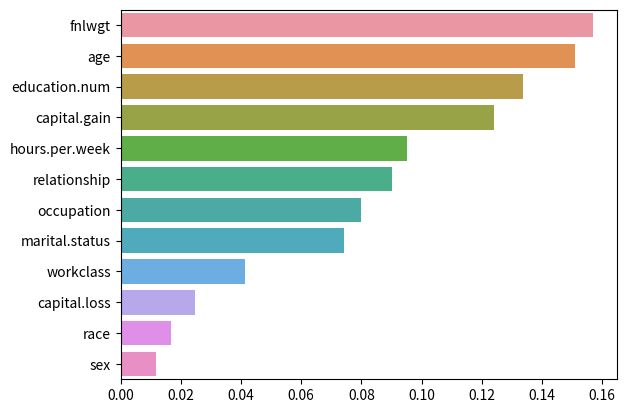

In [31]:
import seaborn as sns

# 각 특성(Feature)의 중요도를 시각화할 시리즈(Series) 생성
feature_series = pd.___(data=rf_classifier.___, index=train_data.___)

# 중요도 값 기준으로 내림차순 정렬
feature_series = feature_series.___(ascending=False)

# 중요도를 막대 그래프로 표현하기 위해 seaborn의 barplot 함수 사용
# x에는 중요도 값(feature_series)을, y에는 특성의 이름(열의 이름)을 설정
sns.___(x=___, y=feature_series.index)

# 그래프 출력
plt.show()

In [ ]:
#checkcode
ensure_vals(globals(), 'feature_series')
@check_safety
def check(
    importance_series: pd.Series,
    col1: str,
    col2: str,
    col3: str
):
    c_point1 = col1 not in importance_series.index
    c_point2 = col2 not in importance_series.index
    c_point3 = col3 not in importance_series.index

    if c_point1 and c_point2 and c_point3 :
        return True
    else:
        return False

check(feature_series, 'education', 'ID', 'native.country')

### Inst.
해당 코드는 랜덤 포레스트 분류기(RandomForestClassifier) 모델을 사용하여 학습한 후, 각 특성(Feature)의 중요도를 시각화하는 과정을 나타냅니다.

> `rf_classifier.feature_importances_`

랜덤 포레스트 모델에서 학습한 각 특성의 중요도를 나타내는 속성입니다.   
모델이 예측을 수행하는 데 어떤 특성이 얼마나 중요한 역할을 하는지를 나타내는 값들로 구성되어 있습니다.

> `pd.Series(data=rf_classifier.feature_importances_, index=x_train.columns)`

`rf_classifier.feature_importances_` 값을 기반으로 데이터프레임의 형태로 중요도 값을 저장합니다.   
여기서 `x_train.columns`은 특성의 이름(열의 이름)을 나타내며, 이를 인덱스로 설정하여 각 특성에 대한 중요도를 레이블링합니다.

> `feature_series.sort_values(ascending=False)`

중요도 값들을 내림차순으로 정렬합니다.   
이렇게 하면 중요도가 높은 순서대로 데이터프레임이 정렬됩니다.

> `sns.barplot(x=feature_series, y=feature_series.index)`

seaborn 라이브러리의 `barplot` 함수를 사용하여 중요도가 높은 특성 순으로 막대 그래프를 생성합니다.   
`x`에는 중요도 값(`feature_series`)을, `y`에는 특성의 이름(열의 이름)을 지정합니다.   
이렇게 하면 각 특성의 중요도를 시각적으로 파악할 수 있습니다.

이 코드를 통해 랜덤 포레스트 모델에서 각 특성의 상대적인 중요도를 시각화하여 어떤 특성이 모델에 영향을 미치는지 확인할 수 있습니다.   
이 정보는 특성 선택이나 모델 해석에 유용하게 활용될 수 있습니다.

---

#### 결과 해석

피처 중요도(Feature Importance)를 시각화한 결과를 보면, 'fnlwgt', 'age', 그리고 'education.num'이 모델 예측에 가장 큰 영향을 미치는 특성들임을 알 수 있습니다.   
이 세 가지 특성은 바(Bar) 차트에서 가장 높은 값을 가지며, 이는 각각의 특성이 우리의 랜덤 포레스트 분류기 모델에서 결과 예측에 중요한 역할을 하는 것을 의미합니다.

'fnlwgt'는 사람들의 인구 통계학적 가중치를 나타내며, 이 값이 높다는 것은 해당 인구 집단이 전체 데이터셋에서 차지하는 비율이 크다는 것을 의미합니다.   
따라서 'fnlwgt'가 높게 나온 것은 해당 특성이 결과 예측에 많은 정보를 제공한다고 볼 수 있습니다.

그 다음으로 'age'와 'education.num'도 중요한 역할을 하는데, 이들은 각각 사람의 나이와 교육 수준(연수)를 나타냅니다.   
나이와 교육 수준은 일반적으로 사람들의 직업 선택과 소득 등에 크게 영향을 미칠 수 있으므로, 이러한 결과가 나온 것은 상당히 합리적입니다.

반면에 바 차트 하단에서 볼 수 있는 'sex'와 'race'는 비교적 낮은 중요도 값을 가지고 있습니다.   
즉, 우리 모델에서 성별과 인종 정보가 소득 예측에 크게 기여하지 않았다는 것입니다.

하지만 주의할 점은, 이러한 해석이 데이터 자체나 실제 현실 문제에 대해 어떤 결론을 내릴 수 있다는 의미가 아니라 오직 우리가 구축한 랜덤 포레스트 모델 내에서만 유효하다는 점입니다.

### Hint.
empty

### Solution
```python
import seaborn as sns

# 각 특성(Feature)의 중요도를 시각화할 시리즈(Series) 생성
feature_series = pd.Series(data=rf_classifier.feature_importances_, index=train_data.columns)

# 중요도 값 기준으로 내림차순 정렬
feature_series = feature_series.sort_values(ascending=False)

# 중요도를 막대 그래프로 표현하기 위해 seaborn의 barplot 함수 사용
# x에는 중요도 값(feature_series)을, y에는 특성의 이름(열의 이름)을 설정
sns.barplot(x=feature_series, y=feature_series.index)

# 그래프 출력
plt.show()
```